# rdkit相似性计算

基于指纹计算相似性的方法有：

- Tanimoto（默认）
- Dice
- Cosine
- Sokal
- Russel
- Kulczynski
- McConnaughey
- Tversky

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import AllChem

from rdkit.Chem import MACCSkeys
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.AtomPairs import Torsions

from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

import matplotlib.pyplot as plt  # 画图

## 基于拓扑指纹和Tanimoto相似性方法指纹计算3个分子的相似性

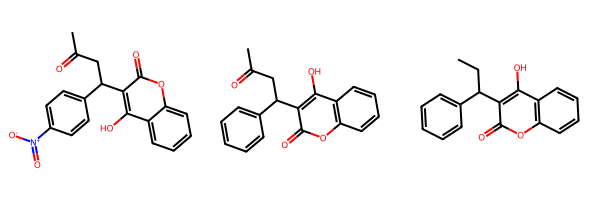

In [2]:
smis = [
    'CC(=O)CC(C1=CC=C(C=C1)[N+]([O-])=O)C1=C(O)C2=CC=CC=C2OC1=O',
    'CC(=O)CC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2',
    'CCC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2'
]
mols = []
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    mols.append(m)

Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(200, 200),
    legends=['' for x in mols]
)


In [3]:
fps = [Chem.RDKFingerprint(x) for x in mols]
sm01 = DataStructs.FingerprintSimilarity(fps[0], fps[1])
sm02 = DataStructs.FingerprintSimilarity(fps[0], fps[2])
sm12 = DataStructs.FingerprintSimilarity(fps[1], fps[2])

print("similarity between mol1 and mol2: %.2f" %
      sm01)  # similarity between mol1 and mol2: 0.93
print("similarity between mol1 and mol3: %.2f" %
      sm02)  # similarity between mol1 and mol3: 0.87
print("similarity between mol2 and mol3: %.2f" %
      sm12)  # similarity between mol2 and mol3: 0.93


similarity between mol1 and mol2: 0.93
similarity between mol1 and mol3: 0.87
similarity between mol2 and mol3: 0.93


## 基于MACCS指纹和Dice相似性方法计算相似性

In [76]:
fps = [MACCSkeys.GenMACCSKeys(m) for m in mols]

sm01 = DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)
sm02 = DataStructs.FingerprintSimilarity(fps[0], fps[2], metric=DataStructs.DiceSimilarity)
sm12 = DataStructs.FingerprintSimilarity(fps[1], fps[2], metric=DataStructs.DiceSimilarity)

print("similarity between mol1 and mol2: %0.2f" %sm01)  # similarity between mol1 and mol2: 0.63
print("similarity between mol1 and mol3: %0.2f" %sm01)  # similarity between mol1 and mol3: 0.63
print("similarity between mol2 and mol3: %0.2f" %sm01)  # similarity between mol2 and mol3: 0.63





similarity between mol1 and mol2: 0.70
similarity between mol1 and mol3: 0.70
similarity between mol2 and mol3: 0.70


## 摩根指纹的形式
摩根指纹和atompairs以及topologicaltosions一样 ， 有两种表现形式 ：

- counts (默认)
- bit vectors

In [5]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1_count = AllChem.GetMorganFingerprint(m1, 2)
fp1_bit = AllChem.GetMorganFingerprintAsBitVect(m1, 2, nBits=1024)
print('非零原子数的字典', len(fp1_count.GetNonzeroElements()))  # 非零原子数的字典 11
print('非零原子数的字典', fp1_count.GetNonzeroElements())
# <rdkit.DataStructs.cDataStructs.UIntSparseIntVect object at 0x1169b2ad0>
print(fp1_count)
# <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x1169b2a80>
print(fp1_bit)


非零原子数的字典 11
非零原子数的字典 {98513984: 3, 422715066: 1, 908339072: 1, 951226070: 2, 2246728737: 1, 2763854213: 1, 3207567135: 1, 3217380708: 1, 3218693969: 5, 3999906991: 2, 4244175903: 2}


## 摩根指纹->ECFP4 和 摩根指纹->FCFP4的比较

通过定义不同的invariants可以输出ECFP 、 FCFP指纹 。ECFP 、 FCFP不同点在于如何计算atom invariants.
ECFP的atom intvariants是连接信息， FCFP的atom invariants是fature-based invariants
RDKit 中的Morgan算法支持feature,ECFP和FCFP中的4代表是摩根指纹的直径为4，半径为2.默认半径为2的摩根指纹就是ECFP指纹，半径为2且考虑feature-based invariants得到的指纹为FCFP4指纹。


In [6]:
ecfp4_mg = AllChem.GetMorganFingerprint(m1, 2)
fcfp4_mg = AllChem.GetMorganFingerprint(m1, 2, useFeatures=True)

print(ecfp4_mg.GetNonzeroElements())  # 11
print(fcfp4_mg.GetNonzeroElements())  # 8

{98513984: 3, 422715066: 1, 908339072: 1, 951226070: 2, 2246728737: 1, 2763854213: 1, 3207567135: 1, 3217380708: 1, 3218693969: 5, 3999906991: 2, 4244175903: 2}
{0: 1, 4: 6, 333654730: 1, 594405804: 1, 1230563926: 3, 3205496001: 1, 3532240404: 2, 3764344801: 5}


同样的两个分子分别基于ECFP4和FCFP4计算相似性其差别可能很大

也可以自己定义atom invariants

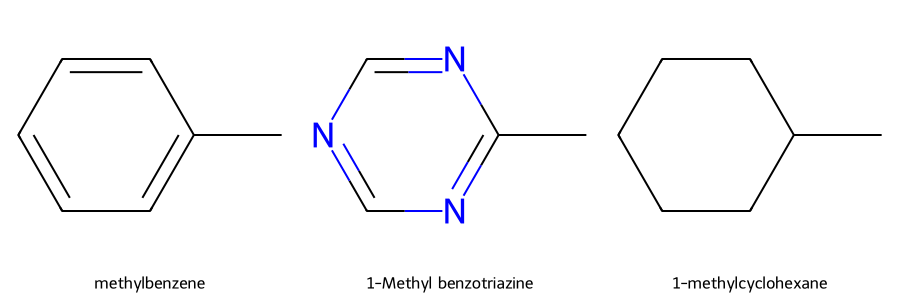

In [7]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncncn1')
m3 = Chem.MolFromSmiles('CC1CCCCC1')

mols = [m1, m2, m3]

Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(300, 300),
    #legends=['' for x in mols],
    legends=['methylbenzene', '1-Methyl benzotriazine', '1-methylcyclohexane']
    # legends=['甲苯', '1-甲基苯三嗪', '1-甲基环己烷']
)



以上述3个分子为例，认识自定义atom invariants计算分子指纹
从上述结构来看，如果原子的atom invariants 是一样的，则分子1和分子2的指纹相同。 默认计算分子指纹的时候会考虑键的类型 bond order。因此 分子3 和分子1、2不同。 如果计算分子指纹的时候不考虑键的类型，则分子1、2、3的指纹相同。


In [8]:
fp1 = AllChem.GetMorganFingerprint(m1, 2, invariants=[1] * m1.GetNumAtoms())
fp2 = AllChem.GetMorganFingerprint(m2, 2, invariants=[1] * m2.GetNumAtoms())
fp3 = AllChem.GetMorganFingerprint(m3, 2, invariants=[1] * m3.GetNumAtoms())
print(fp1)

if (fp1 == fp2):
    print('If set atom invariants are the same, the fp of moleclue 1 and 2 are the same too')
if(fp1 != fp3):
    print("The fp of moleclue 1 and 3 are different because the bond order will be consided in the calculation of fp ")
# If set atom invariants are the same, the fp of moleclue 1 and 2 are the same too
# The fp of moleclue 1 and 3 are different because the bond order will be consided in the calculation of fp

fp1 = AllChem.GetMorganFingerprint(
    m1, 2, invariants=[1]*m1.GetNumAtoms(), useBondTypes=False)
fp3 = AllChem.GetMorganFingerprint(
    m3, 2, invariants=[1]*m3.GetNumAtoms(), useBondTypes=False)
if(fp1 == fp3):
    print("when atom invariants are the same and bond type not considered in the calculation of fp, the fp mol 1 and 3 are the same")
# when atom invariants are the same and bond type not considered in the calculation of fp, the fp mol 1 and 3 are the same


If set atom invariants are the same, the fp of moleclue 1 and 2 are the same too
The fp of moleclue 1 and 3 are different because the bond order will be consided in the calculation of fp 
when atom invariants are the same and bond type not considered in the calculation of fp, the fp mol 1 and 3 are the same


## 解释摩根指纹中bit的含义
ECFP4以count形式表示的时候是没有位数限制的 。 ECFP4以bit的形式表示的时候可以设置bit的位数 ， 如果不设置默认是2048bit 。 尽管是2048bit但是是非常冗余的稀疏矩阵 ， 里面大部分是0
首先通过count 形式计算ECFP4指纹中的有效信息



In [9]:
m = Chem.MolFromSmiles('c1cccnc1C')
info = {}
fp = AllChem.GetMorganFingerprint(m, 2, bitInfo=info)
# print("非零原子：", fp.GetNonzeroElements())
# 非零原子 ：
# {
#     98513984: 2, 422715066: 1,
#     951226070: 1, 1100037548: 1,
#     1207774339: 1, 1235524787: 1,
#     1751362425: 1, 2041434490: 1,
#     2246728737: 1, 2614860224: 1,
#     3217380708: 1, 3218693969: 4,
#     3776905034: 1, 3999906991: 1,
#     4036277955: 1, 4048591891: 1
# }
print('num of keys of info', len(info.keys()))  # num of keys of info 16


num of keys of info 16


由此可知，甲基吡啶分子在ECFP4指纹中最多有16个有效信息
设置不同的nBits计算有效信息的个数

In [10]:
nbits = [64, 128, 256, 1024, 2048]
for nbit in nbits:
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(
        m, radius=2, nBits=nbit, bitInfo=bi)
    print('num nonzero bit in nBit=%d:%d' % (nbit, len(bi.keys())))
# num nonzero bit in nBit=64:13
# num nonzero bit in nBit=128:15
# num nonzero bit in nBit=256:16
# num nonzero bit in nBit=1024:16
# num nonzero bit in nBit=2048:16


num nonzero bit in nBit=64:13
num nonzero bit in nBit=128:15
num nonzero bit in nBit=256:16
num nonzero bit in nBit=1024:16
num nonzero bit in nBit=2048:16


由以上信息可知，当nBit设置为256的时候就不会丢失信息

检查nBits = 256和2048获取的指纹信息是否相同 ：

In [11]:
nbits = [256, 2048]
bis = []
for nbit in nbits:
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(
        m, radius=2, nBits=nbit, bitInfo=bi)
    bis.append(bi)

a = bis[0].values()
b = bis[1].values()

a = list(a)
b = list(b)
ab = a + b
if (len(set(ab)) == len(a)):
    print('fp info calculated by nBits=256 and 2048 are the same')
# fp info calculated by nBits=256 and 2048 are the same

## 注：不同位数算出来的相同信息对应在不同的bit上，且先后排序不一定一样


fp info calculated by nBits=256 and 2048 are the same


查看这16个bit信息

In [12]:
m = Chem.MolFromSmiles('c1cccnc1C')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=256, bitInfo=bi)

for b_v in bi.values():
    print(b_v)


((5, 2),)
((6, 0),)
((1, 1), (2, 1))
((3, 1),)
((0, 0), (1, 0), (2, 0), (3, 0))
((5, 0),)
((4, 2),)
((4, 0),)
((2, 2),)
((4, 1),)
((1, 2),)
((0, 2),)
((6, 1),)
((3, 2),)
((5, 1),)
((0, 1),)


解释第一个信息和第三个信息：信息里面的最小单元对应的是(atom index, radius)。 第一个信息是5号原子半径2的指纹。 第二个信息是1号原子和2原子原子半径为1的指纹。

## 获取指纹对应的结构
获取这3个指纹对应的结构信息

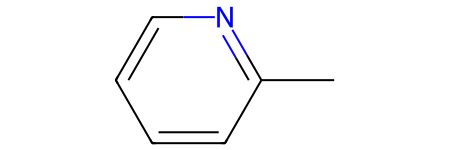

In [13]:
m = Chem.MolFromSmiles('c1cccnc1C')
m

amap用于接收原子索引的映射关系，键为原始分子中的原子索引，值为子结构中的原子索引
env是被提取出的键的索引

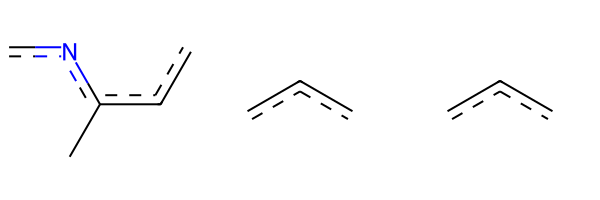

In [14]:
env = Chem.FindAtomEnvironmentOfRadiusN(m, 2, 5)
amap = {}
submol25 = Chem.PathToSubmol(m, env, atomMap=amap)
env = Chem.FindAtomEnvironmentOfRadiusN(m, 1, 1)
amap = {}
submol11 = Chem.PathToSubmol(m, env, atomMap=amap)
env = Chem.FindAtomEnvironmentOfRadiusN(m, 1, 2)
amap = {}
submol12 = Chem.PathToSubmol(m, env, atomMap=amap)

mols = [submol25, submol11, submol12]
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(200, 200),
    legends=['' for x in mols]
)
img


## 可视化指纹中的bit

RDKit中的拓扑指纹 `Chem.RDKFingerprint` 和摩根指纹 Morgan，可以通过如下函数进行可视化。

`rdkit.Chem.Draw.DrawMorganBit()` # 对摩根指纹中的bit 进行可视化。                
`rdkit.Chem.Draw.DrawRDKitBit()` # 对拓扑指纹中的bit 进行可视化。

首先查看分子摩根指纹中的有效bit


In [15]:
mol = Chem.MolFromSmiles('c1cccnc1C')
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=256, bitInfo=bi)

print(bi)

{19: ((5, 2),), 33: ((6, 0),), 64: ((1, 1), (2, 1)), 74: ((3, 1),), 81: ((0, 0), (1, 0), (2, 0), (3, 0)), 100: ((5, 0),), 121: ((4, 2),), 122: ((4, 0),), 131: ((2, 2),), 172: ((4, 1),), 175: ((1, 2),), 179: ((0, 2),), 186: ((6, 1),), 192: ((3, 2),), 195: ((5, 1),), 214: ((0, 1),)}


对bit进行可视化

[19, 33, 64, 74, 81, 100, 121, 122, 131, 172, 175, 179, 186, 192, 195, 214]


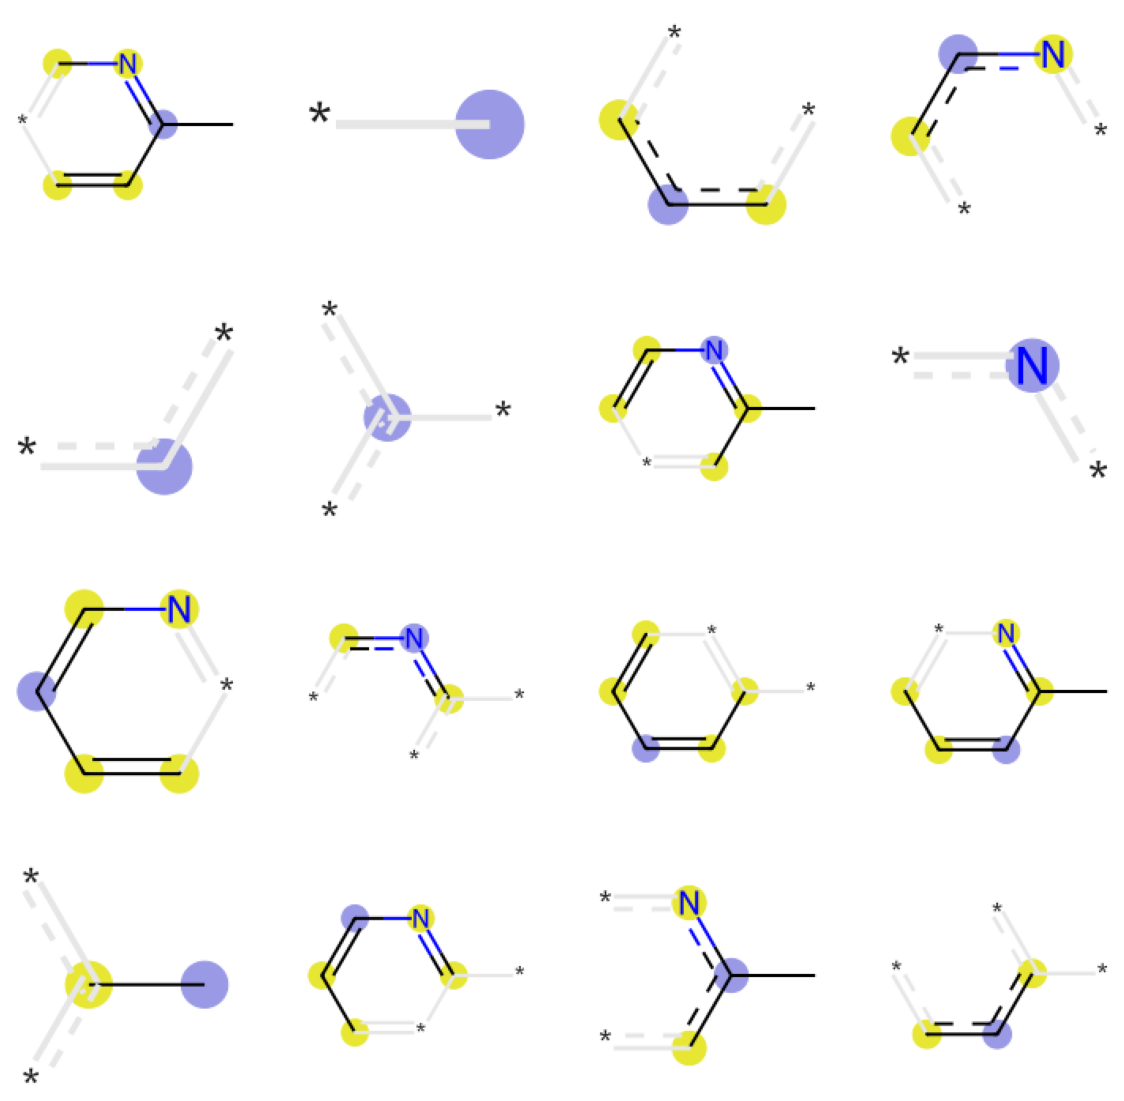

In [42]:
bits = list(bi.keys())
print(bits)

imgs = []
for bit in bits:
    mfp2_svg = Draw.DrawMorganBit(mol, bit, bi)
    imgs.append(mfp2_svg)

def displayingsinrow(imgs, col=4):
    plt.figure(figsize=(20, 20))
    columns = col
    
    for i, image in enumerate(imgs):
        ax = plt.subplot(len(imgs) // columns, columns, i+1)
        ax.set_axis_off()
        plt.imshow(image)
displayingsinrow(imgs)

bi_tuple = [(mol, bit, bi) for bit in list(bi.keys())]
img = Draw.DrawMorganBits(
    bi_tuple,
    molsPerRow=4,
    subImgSize=(250, 250),
    legends=list(
        map(str, list(bi.keys()))
    )
)

img.save("./data/mol26.png")

从上图我们可以看到对摩根指纹可视化的时候，不仅有片段结构，而且对原子用不同颜色进行了标注

- 蓝色：说明该原子是中心原子
- 黄色：说明该原子是芳香原子
- 灰色：说明该原子是脂肪烃原子

In [43]:
Chem.RDKFingerprint(mol)
mol = Chem.MolFromSmiles('c1cccnc1C')
rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=2, bitInfo=rdkbi)
print(list(rdkbi.keys()))
# [5, 161, 294, 330, 633, 684, 744, 808, 842, 930, 1026, 1027, 1060, 1649, 1909]
# 可视化展示
rdkbi_tuple = [(mol, bit, rdkbi) for bit in list(rdkbi.keys())]

img = Draw.DrawRDKitBits(
    rdkbi_tuple,
    molsPerRow=4,
    subImgSize=(200, 200),
    legends=list(
        map(str, list(rdkbi.keys()))
    )
)

img.save("./data/mol27.png")


[5, 161, 294, 330, 633, 684, 744, 808, 842, 930, 1026, 1027, 1060, 1649, 1909]


## 基于分子指纹挑选差异较大的分子

药物虚拟筛选中关键步骤挑选分子，比如筛选获得前1000个分子， 由于成本、时间等因素你想挑选100个分子进行活性测试， 如果你直接挑选前100个分子进行测试，命中率可能会降低。 一般流程是对1000个分子进行聚类，然后每一类里面挑选一个分子（或者中心分子）， 这样可以提高分子骨架的多样性，从而提供虚拟筛选的成功率。


MaxMinPicker是RDKit中的一个模块，用于从一个较大的化合物集合中选择多样性化合物。该算法通过计算化合物之间的相似性得分，然后选择得分最高和最低的化合物，将其添加到输出集合中。这个过程会不断重复，直到达到所需数量的化合物或者达到预设的相似性阈值。

以下是MaxMinPicker的一些参数：

- picks: 需要选择的化合物数量
- distFunc: 用于计算化合物之间相似性的距离函数
- seed: 随机数生成器的种子
- poolSize: 可供选择的化合物数量
- maxAttempts: 最大尝试次数
- minSize: 最小输出集合大小
- threshold: 相似性阈值

In [63]:
mols = Chem.SDMolSupplier("./data/final_mtdh_snd1.sdf")
mols = [m for m in mols if m is not None]

## 计算指纹

# 生成随机的化合物列表
# mols = [Chem.MolFromSmiles(smiles) for smiles in ['C1CCC(CC1)C(=O)O', 'CC(C)CC(C)(C)C', 'CC(=O)Nc1ccccc1', 'CC(C)C(C)(C)C(=O)O', 'C1=CC=C(C=C1)C(=O)O', 'CC(C)C(=O)O', 'CC(C)(C)C(=O)O', 'C1=CC2=C(C=C1)N(C=N2)C3CC3', 'CC(C)(C)OC(=O)C', 'CC(C)(C)OC(=O)CO', 'CC(C)(C)OC(=O)CC', 'CC(C)(C)NC(=O)C', 'CC(C)(C)NC(=O)CC', 'CC(C)(C)NC(=O)CO', 'CC(C)(C)NCC(=O)O', 'CC(C)(C)NCC(O)=O', 'CC(C)(C)NCC(O)CO', 'CCC(C)(C)NC(=O)c1ccc(Cl)cc1', 'CCC(C)(C)NC(=O)c1ccccc1Cl', 'CCC(C)(C)NC(=O)c1cc(Cl)ccc1Cl']]

# 计算分子指纹
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024) for x in mols]

def distij(i, j, fps=fps):
    return 1 - DataStructs.DiceSimilarity(fps[i], fps[j])

# 使用MaxMinPicker选择多样性化合物
picker = MaxMinPicker()

In [68]:
pickIndices = picker.LazyPick(distij, len(fps), 10, seed=23)
for x in pickIndices:
    print(Chem.MolToSmiles(mols[x]))

O=C(NCCN1CCN1)c1cc2c(cc1-n1cnnc1)CCC2
Cc1cc(C2CC2)ncc1C[N@H+]1CCN(Cc2ccncc2)C1
CC(=O)N[C@@H]1C[N@H+]2C[C@@H](C2)OC[C@H]1C(=O)Nc1ccco1
CS(=O)(=O)N1CCCN(c2nnc3c(c2N)CCCC3)CC1
CCc1nc(NCc2csc(N3CNC(=O)C3)[nH+]2)n[nH]1
Cc1ccc(C(=O)[N-]S(=O)(=O)CCC[N@@H+]2CCC(=O)C2)cc1
COc1cc(C(F)F)cnc1[C@H]1CN(C(=O)Cn2cc[nH+]c2)CCO1
O=C1Cc2ccc([S@](=O)CCCC(=O)C3CCC3)cc2N1
CC[C@@H](CNC(=O)c1cccs1)[N@@H+](CCO)Cc1ccsc1
Cc1cnn(-c2cnc([C@@H](C)NC(=O)NC3CC3)nc2C)c1


In [69]:

pickedIndices = picker.LazyBitVectorPick(fps, len(fps), 10, seed=23)
# 输出所选化合物的SMILES字符串
for i in pickedIndices:
    print(Chem.MolToSmiles(mols[i]))

O=C(NCCN1CCN1)c1cc2c(cc1-n1cnnc1)CCC2
Cc1cc(C2CC2)ncc1C[N@H+]1CCN(Cc2ccncc2)C1
CC(=O)N[C@@H]1C[N@H+]2C[C@@H](C2)OC[C@H]1C(=O)Nc1ccco1
CS(=O)(=O)N1CCCN(c2nnc3c(c2N)CCCC3)CC1
CCc1nc(NCc2csc(N3CNC(=O)C3)[nH+]2)n[nH]1
Cc1ccc(C(=O)[N-]S(=O)(=O)CCC[N@@H+]2CCC(=O)C2)cc1
COc1cc(C(F)F)cnc1[C@H]1CN(C(=O)Cn2cc[nH+]c2)CCO1
O=C1Cc2ccc([S@](=O)CCCC(=O)C3CCC3)cc2N1
CC[C@@H](CNC(=O)c1cccs1)[N@@H+](CCO)Cc1ccsc1
Cc1cnn(-c2cnc([C@@H](C)NC(=O)NC3CC3)nc2C)c1


In [62]:
picker.LazyPick?

Docstring:
LazyPick( (MaxMinPicker)self, (AtomPairsParameters)distFunc, (int)poolSize, (int)pickSize [, (AtomPairsParameters)firstPicks=() [, (int)seed=-1 [, (AtomPairsParameters)useCache=None]]]) -> _vecti :
    Pick a subset of items from a pool of items using the MaxMin Algorithm
    Ashton, M. et. al., Quant. Struct.-Act. Relat., 21 (2002), 598-604 
    ARGUMENTS:
    
      - distFunc: a function that should take two indices and return the
                  distance between those two points.
                  NOTE: the implementation caches distance values, so the
                  client code does not need to do so; indeed, it should not.
      - poolSize: number of items in the pool
      - pickSize: number of items to pick from the pool
      - firstPicks: (optional) the first items to be picked (seeds the list)
      - seed: (optional) seed for the random number generator
      - useCache: IGNORED
    

    C++ signature :
        std::vector<int, std::allocator<int> > LazyPic

## 相似性地图
相似性地图可用于可视化原子对两个分子的相似性贡献， 该方法位于 rdkit.Chem.Draw.SimilarityMaps 模块中。
该方法支持三种类型的指纹：

- `atom pairs` 类型表现形式 normal(default)、hashed 和 bit vector(bv)
- `topological torsions` 类型表现形式normal(default)、hashed 和 bit vector(bv)
- `Morgan fingerprints` 类型表现形式 bit vector(bv, default) 和 count vector(count)


计算目标相似性地图，最少需要3个参数：

- 参考分子
- 目标分子
- 指纹函数
- 相似性函数（默认是 Dice similarity）

In [71]:
from rdkit.Chem.Draw import SimilarityMaps
SimilarityMaps.GetSimilarityMapForFingerprint?

Signature:
SimilarityMaps.GetSimilarityMapForFingerprint(
    refMol,
    probeMol,
    fpFunction,
    metric=<Boost.Python.function object at 0x556a84e839b0>,
    **kwargs,
)
Docstring:
Generates the similarity map for a given reference and probe molecule,
fingerprint function and similarity metric.

Parameters:
  refMol -- the reference molecule
  probeMol -- the probe molecule
  fpFunction -- the fingerprint function
  metric -- the similarity metric.
  kwargs -- additional arguments for drawing
File:      ~/anaconda3/envs/gnn/lib/python3.8/site-packages/rdkit/Chem/Draw/SimilarityMaps.py
Type:      function


In [73]:
# 目标分子
targetmol = Chem.MolFromSmiles(
    'COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
# 参考分子
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

d = Draw.MolDraw2DSVG(400, 400)
d.ClearDrawing()
target_mol_simi_fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(
    refmol,
    targetmol,
    lambda m, i: SimilarityMaps.GetMorganFingerprint(
        m, i, radius=2, fpType='bv'),
    draw2d=d
)

print(target_mol_simi_fig)  # Figure(250x250)
print(maxweight)  # 0.12255947497949138
d.FinishDrawing()

with open('./data/mol28.svg', 'w+') as outf:
    outf.write(d.GetDrawingText())


0.12255947497949138


原子颜色越绿，对相似性的贡献越大。             
或者可以用以下方法

In [74]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(
    refmol, mol, SimilarityMaps.GetMorganFingerprint)

print(['%.2f' % w for w in weights])
# ['0.11', '0.11', '0.08', '0.07', '-0.03', '0.07', '0.02']


['0.11', '0.11', '0.08', '0.07', '-0.03', '0.07', '0.02']
